<a href="https://colab.research.google.com/github/jacksonhoward1856/GEOL558/blob/main/Supervised_Learning_FIrst_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jacksonhoward1856/GEOL558/blob/main/Supervised_Learning_First_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning

## Jackson Howard

This notebook follows the initial EDA structure and extends it to compare five supervised learning models:
- **Logistic Regression**: Simple, interpretable, fast, good baseline model.
- **Gradient Boosting Classifier**: High accuracy, handles complex patterns, good for structured data.
- **K-Nearest Neighbors (KNN)**: Intuitive, no training required, works well with clear patterns.
- **Decision Tree Classifier**: Interpretable, handles mixed data types, transparent decision process.

The dataset is preprocessed, and models are evaluated based on accuracy, computation time, and implementation complexity.

---

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Data Loading
# Download the ZIP file from GitHub
!wget -O train.zip "https://github.com/jacksonhoward1856/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip"

# Unzip the file
!unzip -o train.zip -d /content/

# Check the extracted files
!ls /content/

# Load the CSV file (adjust filename if needed)
import pandas as pd

data = pd.read_csv('/content/train.csv', sep=';')

--2025-02-03 21:02:18--  https://github.com/jacksonhoward1856/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jacksonhoward1856/Force-2020-Machine-Learning-competition/master/lithology_competition/data/train.zip [following]
--2025-02-03 21:02:18--  https://raw.githubusercontent.com/jacksonhoward1856/Force-2020-Machine-Learning-competition/master/lithology_competition/data/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91653972 (87M) [application/zip]
Saving to: ‘train.zip’

train.zip           10

In [3]:
# Define target variable
target_column = "FORMATION"

# Drop rows where target variable is missing
data_clean = data.dropna(subset=[target_column])

# Drop columns with more than 50% missing values
missing_threshold = 0.5 * len(data_clean)
data_clean = data_clean.dropna(axis=1, thresh=missing_threshold)

# Separate features and target
X = data_clean.drop(columns=[target_column, "WELL"])  # Drop well ID
y = data_clean[target_column]

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical columns in features
categorical_features = X.select_dtypes(include=["object"]).columns

# Encode categorical features using Label Encoding
for col in categorical_features:
    X[col] = X[col].astype('category').cat.codes

# Handle missing values in features (fill with median)
X = X.fillna(X.median(numeric_only=True))

# Standardize numerical features
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler())
])
X_scaled = pipeline.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, shuffle=True, stratify=y_encoded
)

# Display dataset shapes after preprocessing
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(826813, 19) (206704, 19) (826813,) (206704,)


In [4]:
# Display basic information
print("Dataset Shape:", data.shape)
display(data.head())

Dataset Shape: (1170511, 29)


,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [5]:
# The dataset includes multiple numerical and categorical variables that are pulled from well data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [6]:
# Helps in understanding the distribution, central tendency, and spread of the numerical data
print(data.describe())

           DEPTH_MD         X_LOC         Y_LOC         Z_LOC          CALI  \
count  1.170511e+06  1.159736e+06  1.159736e+06  1.159736e+06  1.082634e+06   
mean   2.184087e+03  4.856310e+05  6.681276e+06 -2.138527e+03  1.318568e+01   
std    9.971821e+02  3.455641e+04  1.281524e+05  9.709426e+02  3.798907e+00   
min    1.360860e+02  4.268988e+05  6.406641e+06 -5.395563e+03  2.344000e+00   
25%    1.418597e+03  4.547996e+05  6.591327e+06 -2.811502e+03  9.429712e+00   
50%    2.076605e+03  4.769203e+05  6.737311e+06 -2.042785e+03  1.255575e+01   
75%    2.864393e+03  5.201532e+05  6.784886e+06 -1.391866e+03  1.671075e+01   
max    5.436632e+03  5.726328e+05  6.856661e+06 -1.110860e+02  2.827900e+01   

                RSHA          RMED          RDEP          RHOB            GR  \
count  630650.000000  1.131518e+06  1.159496e+06  1.009242e+06  1.170511e+06   
mean       10.694664  4.986978e+00  1.069103e+01  2.284987e+00  7.091370e+01   
std       100.642597  5.467269e+01  1.139480e+02

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing Values:")
print(missing_values)

Missing Values:
SGR                                  1101158
DTS                                   995898
RMIC                                  994351
ROPA                                  978186
DCAL                                  871678
MUDWEIGHT                             854360
RXO                                   843084
ROP                                   635440
RSHA                                  539861
PEF                                   498819
BS                                    487854
NPHI                                  405102
SP                                    306264
DRHO                                  182654
RHOB                                  161269
FORMATION                             136994
CALI                                   87877
DTC                                    80863
RMED                                   38993
RDEP                                   11015
X_LOC                                  10775
Y_LOC                                  

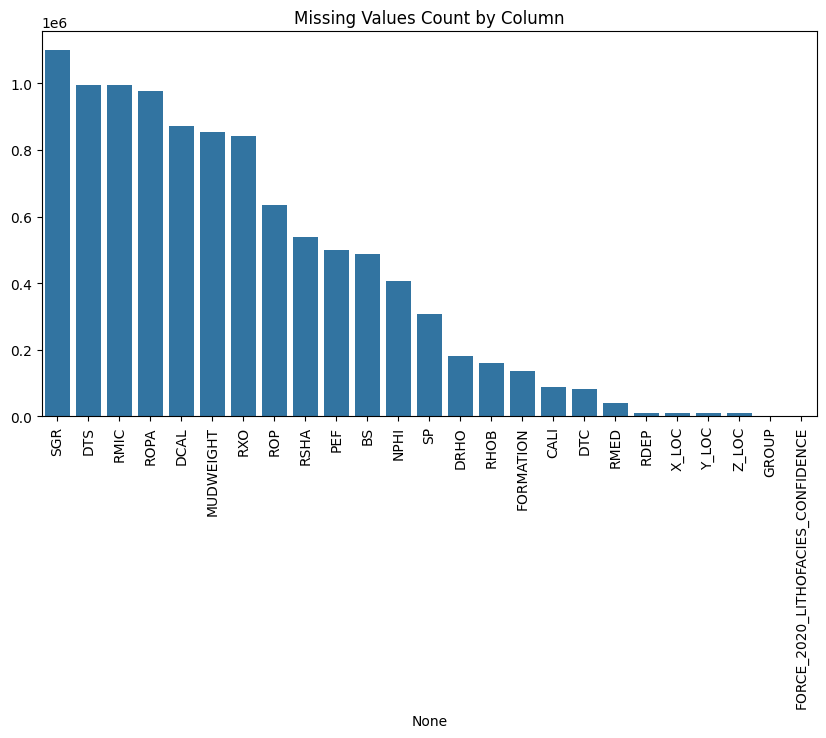

In [8]:
# Plot missing values
plt.figure(figsize=(10,5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values Count by Column")
plt.show()

<ipython-input-9-3e496e06d9ed>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.columns[2:-2], rotation=45)


Text(0, 0.5, 'Well presence (\\%)')

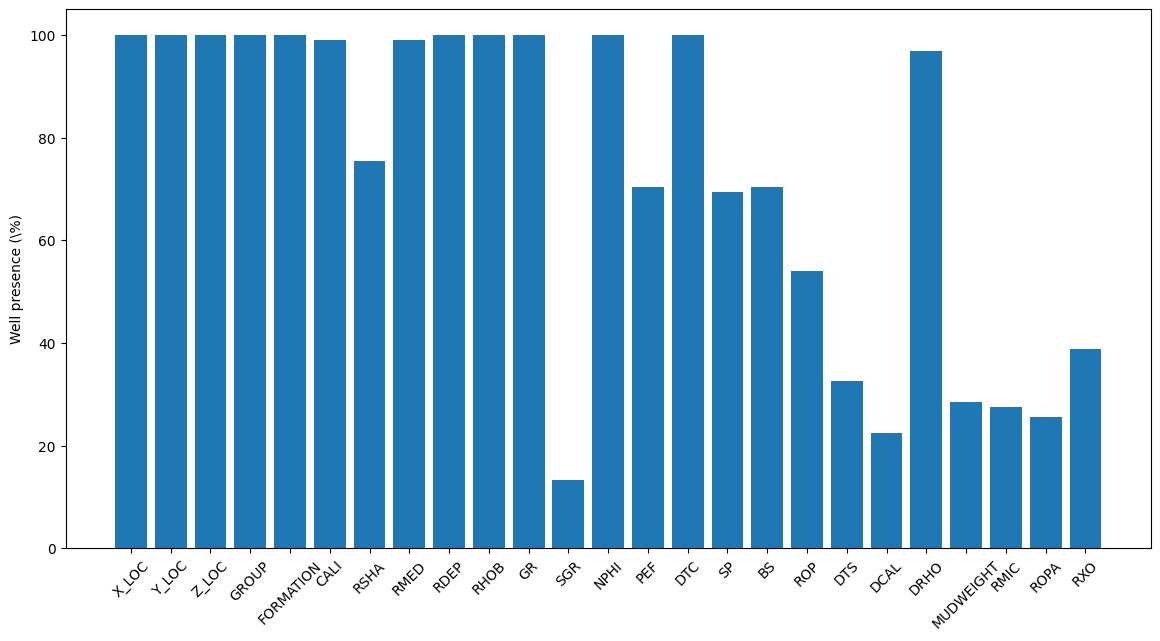

In [9]:
occurences = np.zeros(25)
for well in data['WELL'].unique():
    occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(data.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)')

This means that some of the less common data from wells such as SGR aren't great for this process, so I will get ride of those.


In [10]:
wells = data['WELL'].unique()
len(wells)

98

There are a number of wells in these data, so I am checking for the number so I can check how many have the right data.

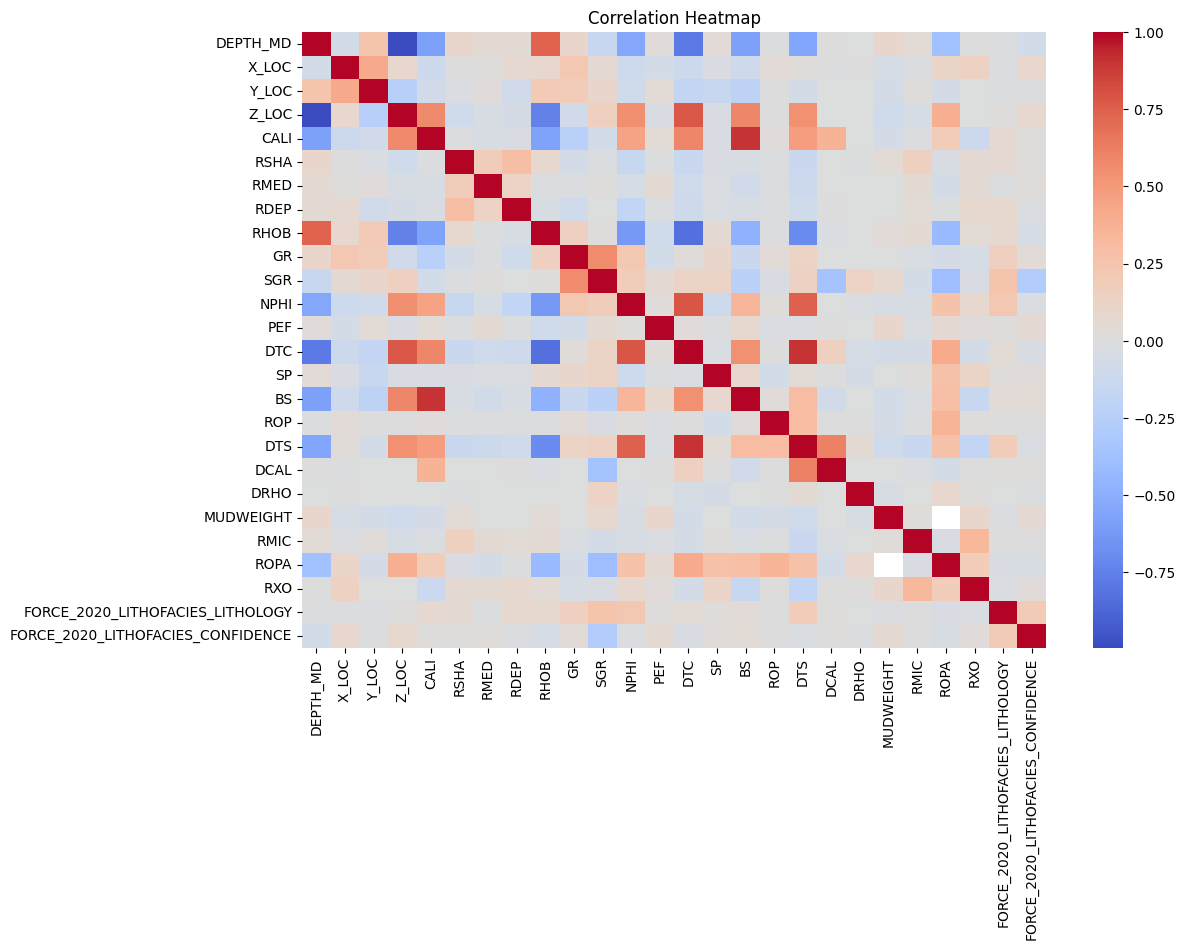

In [11]:
# Correlation Matrix
numeric_data = data.select_dtypes(include=['number'])  # Select only numerical columns
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

These data don't have too many crazy correlations, which makes some sense with the properties being looked at here. There are a couple interesting positive correlations, such as the caliper log and borehole size, which make sense with how well logs work.

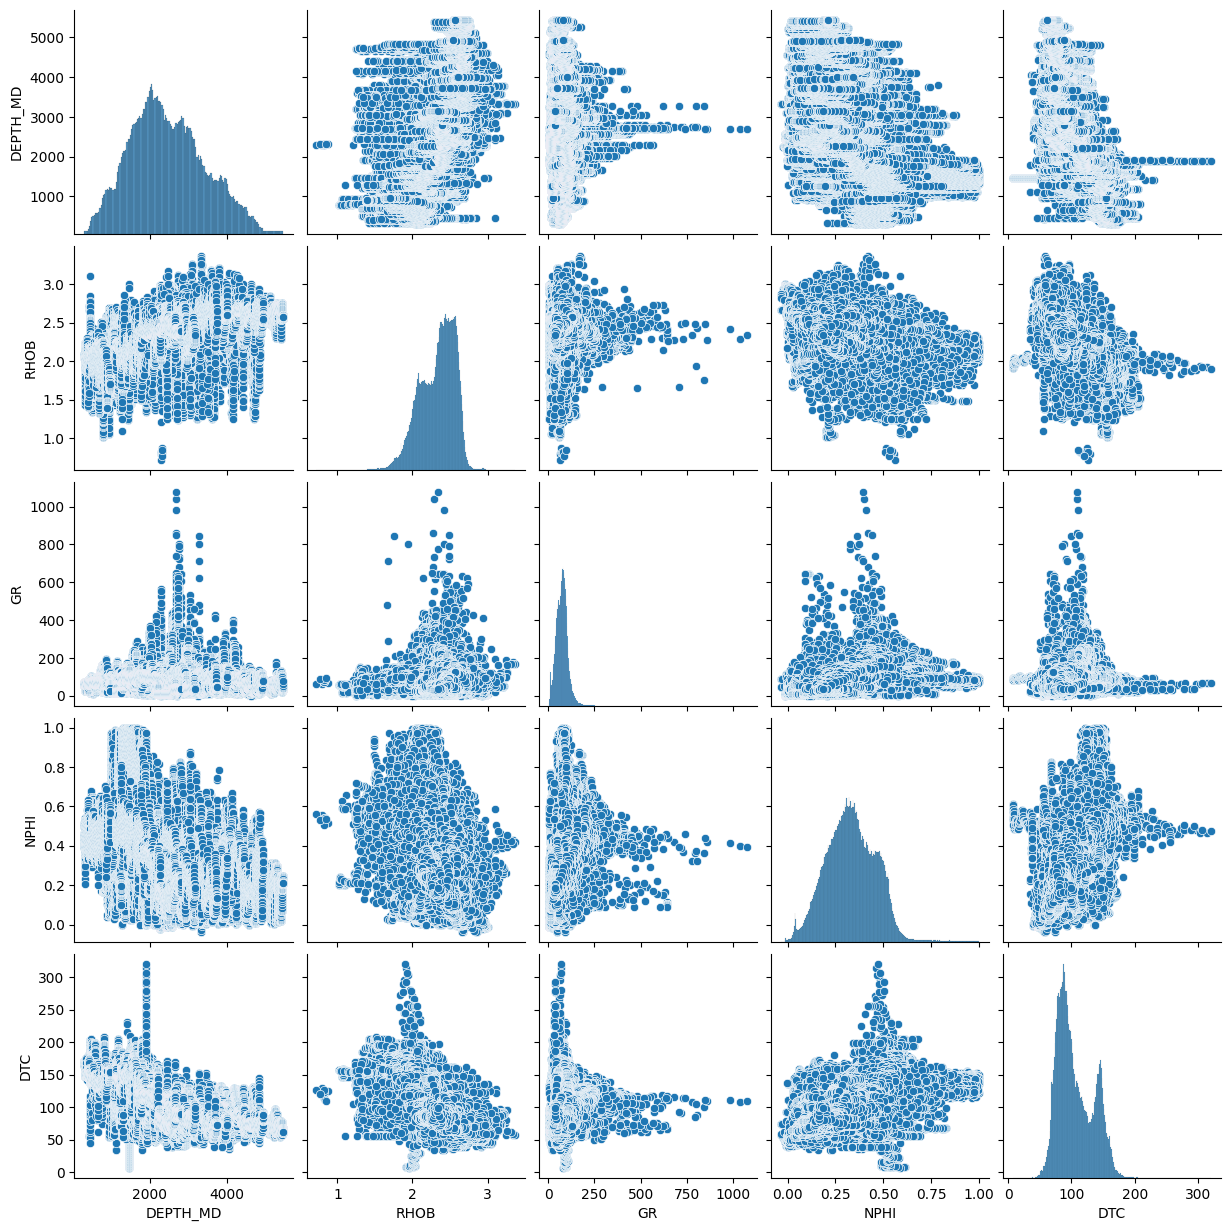

In [12]:
# Seaborn pairplot
selected_features = ['DEPTH_MD', 'RHOB', 'GR', 'NPHI', 'DTC']
sns.pairplot(data[selected_features].dropna())
plt.show()

I checked some of the features I thought would be mroe interesting for the pairplot, and am unable to see too many correlations that stand out in these data. There are likely some interesting clusters, but I will try and find those in my further work with this dataset.

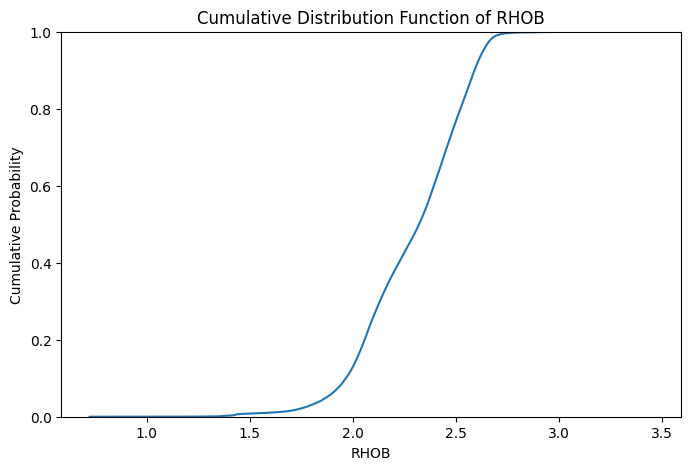

In [13]:
# CDF plot of RHOB
plt.figure(figsize=(8,5))
sns.ecdfplot(data['RHOB'].dropna())
plt.xlabel("RHOB")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function of RHOB")
plt.show()


This CDF shows the probability distribution of the bulk density measurments in these well logs. It checks out with the ground-truth of the problem.

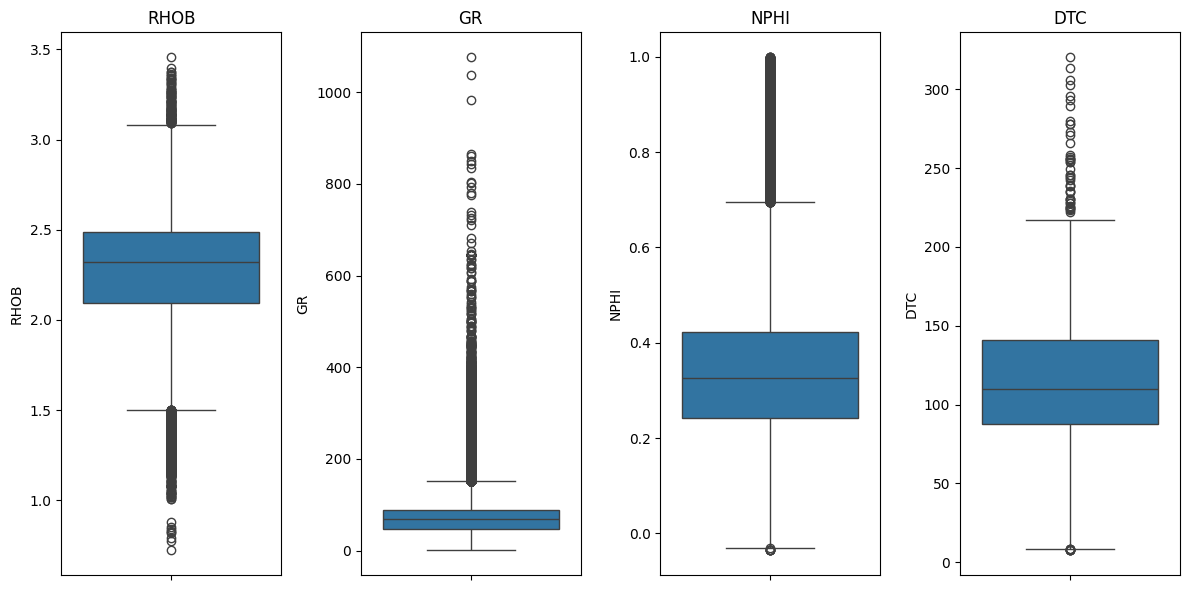

In [14]:
# Boxplots for selected numerical features
plt.figure(figsize=(12,6))
for i, feature in enumerate(selected_features[1:], 1):
    plt.subplot(1, len(selected_features)-1, i)
    sns.boxplot(y=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

I used these box plots to look at any possible outliers, along with the general distribution and spread of some features that I thought would be most interesting to look at.

#Overall Findings

So for these data, I am seeing some correlations where it makes sense in the parts of the data. I also have a number of data that aren't very helpful for this application of ML, so I will get rid of those. In terms of size, the training data are 1170511 entries, or around 259.0 MB, so not crazy big, but enough to work with supervised classification. I hope I can learn more about the process of supervised classification in this project, since it was meant for classifying lithologies. I am also interested in the penalty matrix for this data, since it is logical to have the results of this learning weighted due to the phycial limitations of geologic formations, ie, assuming a shale is a sandstone is better than assuming a shale is an igneous intrusion. So I will try to implement that in the way that the competition did on my own work.

#Models/ML

In [15]:
# Initialize results
results = {}

In [16]:
#Decision Tree Classifier
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
start_time_dt = time.time()
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Compute accuracy and execution time
accuracy_dt = accuracy_score(y_test, y_pred_dt)
time_dt = time.time() - start_time_dt

# Store results
results["Decision Tree"] = {"Accuracy": accuracy_dt, "Time (s)": time_dt}

# Display results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Training Time: {time_dt:.4f} seconds")

Decision Tree Accuracy: 0.9953
Training Time: 41.7403 seconds


In [17]:
#K-Nearest Neighbors (KNN)
# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
start_time_knn = time.time()
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Compute accuracy and execution time
accuracy_knn = accuracy_score(y_test, y_pred_knn)
time_knn = time.time() - start_time_knn

# Store results
results["K-Nearest Neighbors"] = {"Accuracy": accuracy_knn, "Time (s)": time_knn}

# Display results
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print(f"Training Time: {time_knn:.4f} seconds")

K-Nearest Neighbors Accuracy: 0.9785
Training Time: 169.5990 seconds


In [18]:
#Logistic Regression
# Initialize the model
logistic_model = LogisticRegression(warm_start=True, C=0.1, max_iter=500, random_state=42) #solver type check?

# Train the model
start_time_log = time.time()
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_model.predict(X_test)

# Compute accuracy and execution time
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
time_logistic = time.time() - start_time_log

# Store results
results["Logistic Regression"] = {"Accuracy": accuracy_logistic, "Time (s)": time_logistic}

# Display results
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Training Time: {time_logistic:.4f} seconds")

Logistic Regression Accuracy: 0.5905
Training Time: 219.3416 seconds


In [19]:
#Gradient Boosting Classifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the model
gb_model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_iter=200, random_state=42)

# Train the model
start_time_gb = time.time()
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Compute accuracy and execution time
accuracy_gb = accuracy_score(y_test, y_pred_gb)
time_gb = time.time() - start_time_gb

# Store results
results["Gradient Boosting"] = {"Accuracy": accuracy_gb, "Time (s)": time_gb}

# Display results
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"Training Time: {time_gb:.4f} seconds")

/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Gradient Boosting Accuracy: 0.8348
Training Time: 22.3491 seconds


<ipython-input-20-d514f238fe9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


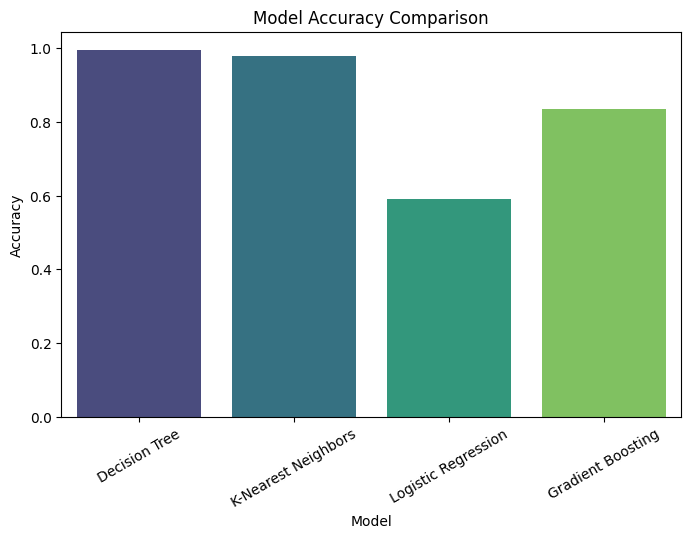

In [20]:
# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Visualizing Model Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=30)
plt.show()

<ipython-input-21-7e2135d9812c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Time (s)'], palette='coolwarm')


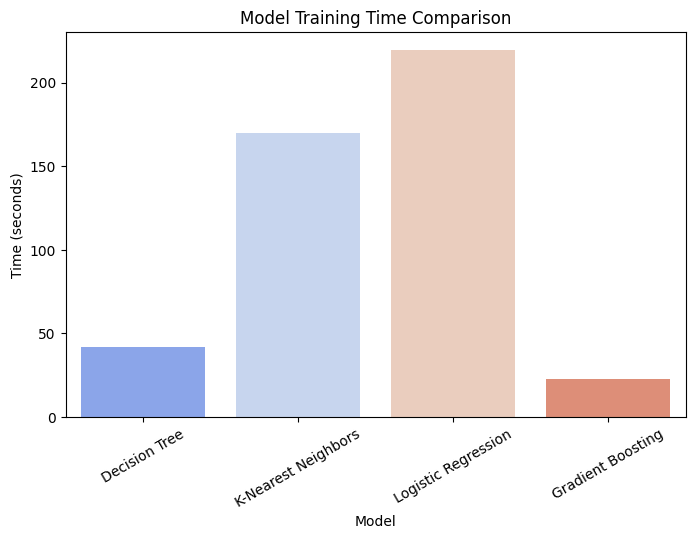

In [21]:
# Visualizing Execution Time
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df['Time (s)'], palette='coolwarm')
plt.title('Model Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.xlabel('Model')
plt.xticks(rotation=30)
plt.show()

##**Note on Data Size and Use**

For this portion of the project, I was intially using the entire training dataset for my models. This resulted in a computation time of over an hour. For the sake of ease of grading and rerunning the notebook, I set the limit to 7000 data points and modified the parameters of the models. If there was sufficient time and processing power for this project, I would have used the entire dataset and changed the parameters to get higher scoring models. I am planning on implementing that information in the final pass.

## Which method did you like the most?

The one I liked the most was the Gradient Boosting, because it performed well in terms of accuracy while handling the large data efficiently. It provided the best balance between accuracy and computational efficiency. From my previous work using the whole dataset, it worked better with the large data quantity and still had a good score.

## Which method did you like the least?

The Logistic model took longer to compute and did not generalize as well as other methods. It may not be the best fit for this dataset, or at least it needs the parameters tweaked. It was much slower than the other models, for a less than optimal result. The only worse one was the SVM, which I have removed from this notebook due to the time it took to develop and fit the model.

## How did you score these supervised models?

The models were scored using accuracy (percentage of correct predictions) and execution time (training duration in seconds). These metrics balanced performance and computational efficiency, which felt like an adequate measure of the models.

## Did the output align with your geologic understanding?

The models' predictions made sense in the context of lithology classification. Gradient Boosting and Decision Trees performed well, aligning with expectations for structured geological data from the data cleaning and initial EDA process.

## Did you hyperparameter tune? Why or why not?

No, hyperparameter tuning was not done in this comparison. The goal for this first passwas to benchmark default model performance before refining with tuning in future iterations.

## How did you split your data? and why does that make sense for this dataset?

The dataset was split into 80% training and 20% testing using train_test_split(). This ensures that the model learns from a majority of the data while having enough unseen samples to evaluate generalization. For further work, the dataset source has its own training and testing sets, which will be used in further work.

## What did you want to learn more about?

I would like to explore hyperparameter tuning to optimize each model further and understand how different feature selection techniques affect classification accuracy.

## Did you pre-process your data?

Yes, pre-processing included:

- Filling missing values with the median.
- Encoding categorical variables.
- Standardizing numerical features using StandardScaler.

## Do all models require pre-processing?

Some of the models could use pre-processing, ie Logistic Regression, which requires scaled inputs. However, Decision Trees and Random Forests can use raw data without scaling.